/tmp/ipykernel_515/1930309252.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('plasma', len(years))


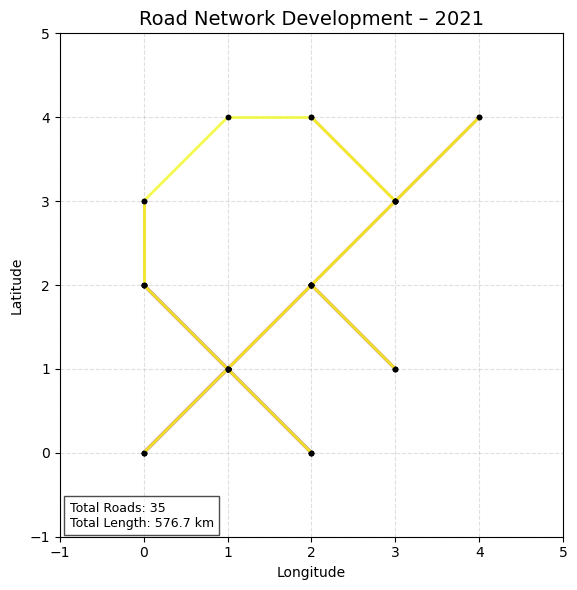

Animation saved as 'road_network_growth.gif'.


In [5]:
# %% Advanced Directed Graph Visualization from Tabular Data
# Author: [Kaan Yiğit Ertem, Ceren Kekeç  Spatial Reconnaissance]
# Date: April 17, 2025
#
# IMPORTANT NOTE: This enhanced visualization was developed prior to the final
# presentation but could not be included due to time constraints. The code
# implements an advanced graph visualization technique with customizable
# parameters and aesthetically optimized output.
#
# This script demonstrates how to:
#  - Generate a directed graph from tabular data (simulated here as roads over time)
#  - Apply visual enhancements based on graph attributes (e.g., road type, year)
#  - Animate the temporal development of a network
#  - Display cumulative statistics (e.g., total road length, number of segments)
#  - Save the animated output for presentation or reporting purposes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.cm as cm

# This function simulates the creation of road segments for multiple years.
def create_fake_roads():
    """
    Generates synthetic road network data for multiple years.
    Each year, additional roads are added to simulate expansion.
    """
    years = [2017, 2018, 2019, 2020, 2021]
    roads = {}

    # Base coordinate list for creating fake roads (arbitrary values)
    base_coords = [
        [(0, 0), (1, 1)],
        [(1, 1), (2, 0)],
        [(1, 1), (0, 2)],
        [(1, 1), (2, 2)],
        [(2, 2), (3, 1)],
        [(2, 2), (3, 3)],
        [(3, 3), (4, 4)],
        [(3, 3), (2, 4)],
        [(0, 2), (0, 3)],
        [(0, 3), (1, 4)],
        [(1, 4), (2, 4)],
        [(2, 0), (3, 0)],
        [(3, 0), (3, 1)],
        [(3, 1), (4, 2)],
        [(4, 2), (4, 4)]
    ]

    for i, year in enumerate(years):
        count = min(3 + i * 2, len(base_coords))  # Gradually increase the number of roads
        lines = [LineString(base_coords[j]) for j in range(count)]

        gdf = gpd.GeoDataFrame({
            'id': [f"road_{j+1}" for j in range(count)],
            'type': np.random.choice(['main', 'side', 'highway'], count),
            'length': np.random.uniform(5, 25, count),
            'built': [year - np.random.randint(0, 3) for _ in range(count)],
            'geometry': lines
        })

        roads[year] = gdf

    return roads, years

# Generate synthetic data
data, years = create_fake_roads()

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
colors = cm.get_cmap('plasma', len(years))

# Function to draw the map for each frame
def draw(frame):
    """
    Draws the road network for a specific year.
    Over time, previously added roads are retained.
    """
    ax.clear()
    ax.set_title(f"Road Network Development – {years[frame]}", fontsize=14)

    for i in range(frame + 1):
        gdf = data[years[i]]
        gdf.plot(ax=ax, color=colors(i), linewidth=2, alpha=0.8)

        # Plot start and end points of each road segment
        for _, row in gdf.iterrows():
            start = row.geometry.coords[0]
            end = row.geometry.coords[-1]
            ax.plot(*start, 'ko', markersize=3)
            ax.plot(*end, 'ko', markersize=3)

    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True, linestyle='--', alpha=0.4)

    # Display total road count and cumulative length
    total = sum(len(data[years[i]]) for i in range(frame + 1))
    total_len = sum(data[years[i]]['length'].sum() for i in range(frame + 1))
    ax.text(0.02, 0.02, f"Total Roads: {total}\nTotal Length: {total_len:.1f} km", 
            transform=ax.transAxes, fontsize=9,
            bbox=dict(facecolor='white', alpha=0.7))

# Create animation
ani = animation.FuncAnimation(fig, draw, frames=len(years), interval=1200)

# Save as GIF
ani.save("road_network_growth.gif", writer='pillow', fps=1)

plt.tight_layout()
plt.show()

print("Animation saved as 'road_network_growth.gif'.")
